# 1D Linear Regression for Weather dataset

The [Shanghai AQI and Wheather dataset from 2014-2021](https://www.kaggle.com/code/kerneler/starter-shanghai-air-pollution-and-7c6ab44f-e/data) is used in this notebook.

Regression Mechanics:

y = ax + b

where,

* y = target
* x = single feature
* a, b = parameters (slope and intercept)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/Shanghai AQI and Wheather 2014-2021.csv")
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [20]:
df.columns

Index(['date', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'AQI', 'AQI_Explained'],
      dtype='object')

In [5]:
df.AQI_Explained.unique()

array(['Hazardous', 'Very unhealthy', 'Unhealthy',
       'Unhealthy for sensitive groups', 'Moderate'], dtype=object)

In [12]:
# add date in index
df.index = df.date

# Regression equation between Heat Index and Air Quality Index
X = df['HeatIndexC'].values.reshape(-1,1)
y = df['AQI'].values.reshape(-1,1)

# Train and test dataset (80% training dataset and 20% test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model from sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print('Accuracy: {}'.format(score))

Accuracy: 0.11562741624185147


## Regression metrices

1. RMSE
2. R-Squared

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)

print("R square: ", r2, "\n RMSE: ", mse)

R square:  0.11562741624185147 
 RMSE:  71.38836611636859


### Plot the regression line with test dataset

Text(0, 0.5, 'Air Quality Index')

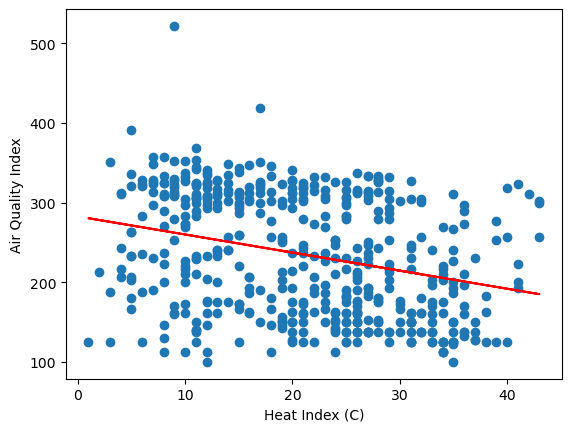

In [90]:
pred = lr.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')
plt.xlabel("Heat Index (C)")
plt.ylabel("Air Quality Index")

### Regression Equation

In [71]:
a = lr.coef_
b = lr.intercept_

print(f'Regression Equation: y = {a[0][0]}x + {b[0]}')

Regression Equation: y = -2.2710211521502797x + 282.7601083061348


# Multi-dimensional linear regression

y = a1x1 + a2x1 + a3x3 + ....... + anxn + b

Where,

* y = target
* x1, x2, x3 ... = features
* a1, a2, a3 ..., b = parameters (slope and coefficients)

**R square:** It quantifies the variance in target values (value ranges from 0 to 1)

In [17]:
# add date in index
df.index = df.date

# Regression equation between Heat Index and Air Quality Index
X = df.drop(columns=['AQI', 'AQI_Explained', 'date'])
y = df['AQI']

# Train and test dataset (80% training dataset and 20% test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Linear regression model from sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print('Accuracy: {}'.format(score))

Accuracy: 0.23105095402329812


# Cross validation

* To test the ability of ML model to predict new data
* Used to give the insight on how model generalize to an independent dataset

In [18]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
cv_results = cross_val_score(lr, X, y, cv=kf)
cv_results

array([0.27003867, 0.27694103, 0.27623708, 0.23331048, 0.25832416])

In [19]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.2629702822868043
0.016263100556890165
[0.23581185 0.27687063]


# Regularization

Lets say, the regression equation as below,

Y ≈ β0 + β1X1 + β2X2 + …+ βpXp

The loss function also know as residual sum of square or RSS equation for above regression equation will be,

![Regression equation loss function](./img/loss_reg_eqation.webp)

Used to avoid overfitting. There are two types of regularization in machine learning.

### 1. Ridge Regression

![Ridge equation](./img/redge_equation.webp)

### 2. Lasso Regression

It can select only the important features. It srinks the coefficient of less important features to zero. The Lasso regression function also can be used for feature selection.

![Lasso equation](./img/lasso_equation.webp)



In [97]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

    # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)
  
    # Fit the data
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
    
print(ridge_scores)

[0.27004022255785987, 0.2700522089339993, 0.2701161013918356, 0.27036272854275767, 0.2691508866626462, 0.24948236970406235]


# Feature selection

[ 1.72070395e-03 -6.45897355e+00 -0.00000000e+00 -7.18568907e-01
 -6.54194868e+00  1.61039024e-02 -1.02456789e+00 -3.04493127e+00
 -2.54955399e-01  3.66725093e+00  4.66289981e+00 -4.70598672e-01
  0.00000000e+00 -5.70905052e-01 -2.91752262e+00  3.15618391e+00
  9.77177838e-01  1.12203175e-01 -9.87252562e+00]
Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')


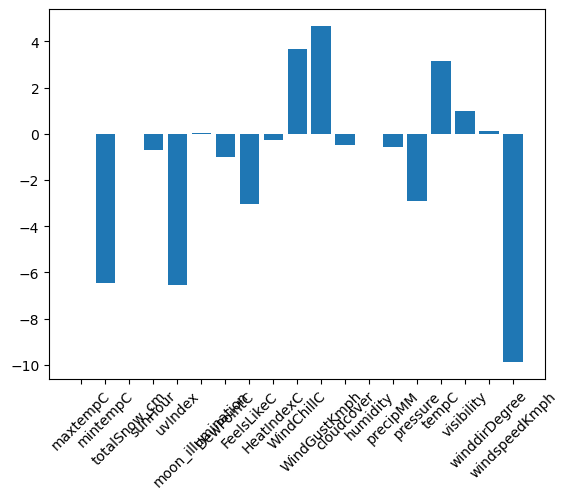

In [98]:
# Import Lasso
from sklearn.linear_model import Lasso

columns = df.drop(columns=['AQI', "AQI_Explained", 'date']).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

print(lasso_coef)
print(columns)
plt.bar(columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()